# Las_Vegas_Strip_Data_Set

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('LasVegasTripAdvisorReviews-Dataset.csv', sep=';')
data.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


There are numeric variables in dataset. Have a preliminary look first 

In [3]:
data.shape

(504, 20)

There are 504 records with 20 variables 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
User country         504 non-null object
Nr. reviews          504 non-null int64
Nr. hotel reviews    504 non-null int64
Helpful votes        504 non-null int64
Score                504 non-null int64
Period of stay       504 non-null object
Traveler type        504 non-null object
Pool                 504 non-null object
Gym                  504 non-null object
Tennis court         504 non-null object
Spa                  504 non-null object
Casino               504 non-null object
Free internet        504 non-null object
Hotel name           504 non-null object
Hotel stars          504 non-null object
Nr. rooms            504 non-null int64
User continent       504 non-null object
Member years         504 non-null int64
Review month         504 non-null object
Review weekday       504 non-null object
dtypes: int64(6), object(14)
memory usage: 78.8+ KB


In [28]:
data.isnull().any()

User country         False
Nr. reviews          False
Nr. hotel reviews    False
Helpful votes        False
Score                False
Period of stay       False
Traveler type        False
Pool                 False
Gym                  False
Tennis court         False
Spa                  False
Casino               False
Free internet        False
Hotel name           False
Hotel stars          False
Nr. rooms            False
Member years         False
Review month         False
Review weekday       False
dtype: bool

There is no missing variable in dataset 

There are two columns related to users' origination, User country and User continent. From the column names, we can guess User country is a subset of User continent. See if there is duplicated information. If so then we can remove User continent

In [5]:
for i in data['User country'].unique():
    if len(data[data['User country']==i]['User continent'].unique())==1:
        pass
    else:
        print('{0} has more than one continent'.format(i))

Mexico has more than one continent


Only Mexico has more than one continent. Let's have a look in detail


In [6]:
data[data['User country']=='Mexico'][['User country','User continent']]

,User country,User continent
71,Mexico,North America
86,Mexico,South America
168,Mexico,North America
290,Mexico,North America
309,Mexico,North America
331,Mexico,North America
383,Mexico,North America
411,Mexico,North America


Appearantly there is a misclassification on row 86(Mexico should be in North America). Therefore that record should be amended 

In [7]:
data['User continent'][86]='North America'
data[data['User country']=='Mexico']['User continent'].unique()

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array(['North America'], dtype=object)

So now all countries have only one continent. User continent can be deleted 

In [8]:
del data['User continent']

After that, we can see if there is any categorical column that only has one unique value. If so then we can also remove from the dataset 

In [9]:
category_variable = list(data.select_dtypes(include='object').columns.values)
for i in category_variable:
    if len(data[i].unique())==1:
        print('{0} has only one unique value')

So there is no variable having only one value. That's good 

Next is to have a look on overall rating in Las Vegas 

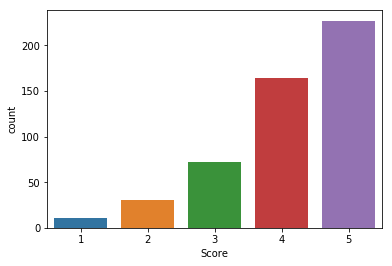

In [10]:
sns.countplot(x='Score',data=data)

In [11]:
for i in sorted(data['Score'].unique()):
    print('There are {0} users rating {1}'.format(data[data['Score']==i].shape[0],i))

There are 11 users rating 1
There are 30 users rating 2
There are 72 users rating 3
There are 164 users rating 4
There are 227 users rating 5


Most users give 4 or 5 in score. Not surprised, it is Vegas
<br>As most users give 4 or 5, I am curious those records with score only 1 to 3. We can see if there is any particular reason causing such low score 

In [12]:
data_lr=data[data['Score'].isin([1,2,3])]

In [13]:
data_lr.shape

(113, 19)

Therer are 113 records with score 1 to 3

First question, which hotel??

In [14]:
data_lr.groupby('Hotel name')['Hotel name'].count().sort_values(ascending=False)

Hotel name
Circus Circus Hotel & Casino Las Vegas                 13
Monte Carlo Resort&Casino                              12
Excalibur Hotel & Casino                               10
Hilton Grand Vacations at the Flamingo                  8
Tuscany Las Vegas Suites & Casino                       7
The Westin las Vegas Hotel Casino & Spa                 7
Treasure Island- TI Hotel & Casino                      6
The Cromwell                                            6
Paris Las Vegas                                         6
Caesars Palace                                          5
Tropicana Las Vegas - A Double Tree by Hilton Hotel     5
The Cosmopolitan Las Vegas                              4
Hilton Grand Vacations on the Boulevard                 4
Bellagio Las Vegas                                      4
The Palazzo Resort Hotel Casino                         4
Wyndham Grand Desert                                    3
Trump International Hotel Las Vegas                     3
Enc

So the first three hotels with highest number of low scores are Circus Circus Hotel & Casino Las Vegas, Monte Carlo Resort&Casino and Excalibur Hotel & Casino
<br>Let's check the distribution of score for these three hotels in original dataset 

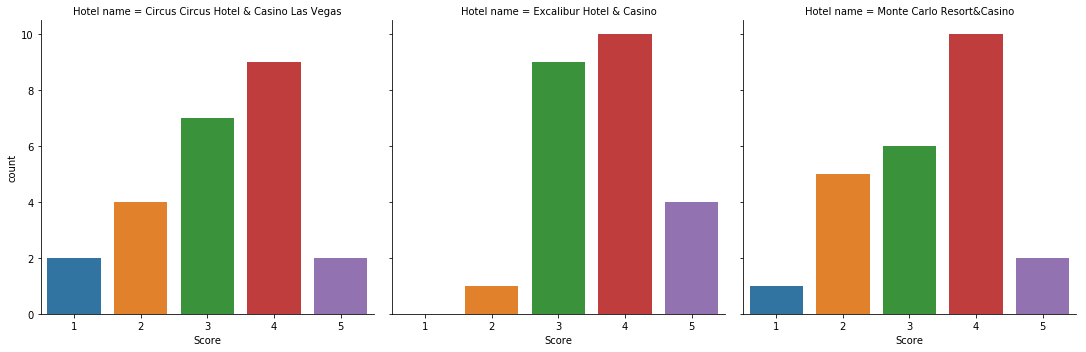

In [15]:
low_score_hotel=['Circus Circus Hotel & Casino Las Vegas','Monte Carlo Resort&Casino','Excalibur Hotel & Casino']
sns.catplot(x='Score',col='Hotel name',data=data[data['Hotel name'].isin(low_score_hotel)],kind='count')

In [25]:
for i in low_score_hotel:
    for j in sorted(data['Score'].unique()):
        print('In {0}, there are {1} users rating {2}'.format(i,data[(data['Score']==j) & (data['Hotel name']==i)].shape[0],j))
    print()

In Circus Circus Hotel & Casino Las Vegas, there are 2 users rating 1
In Circus Circus Hotel & Casino Las Vegas, there are 4 users rating 2
In Circus Circus Hotel & Casino Las Vegas, there are 7 users rating 3
In Circus Circus Hotel & Casino Las Vegas, there are 9 users rating 4
In Circus Circus Hotel & Casino Las Vegas, there are 2 users rating 5

In Monte Carlo Resort&Casino, there are 1 users rating 1
In Monte Carlo Resort&Casino, there are 5 users rating 2
In Monte Carlo Resort&Casino, there are 6 users rating 3
In Monte Carlo Resort&Casino, there are 10 users rating 4
In Monte Carlo Resort&Casino, there are 2 users rating 5

In Excalibur Hotel & Casino, there are 0 users rating 1
In Excalibur Hotel & Casino, there are 1 users rating 2
In Excalibur Hotel & Casino, there are 9 users rating 3
In Excalibur Hotel & Casino, there are 10 users rating 4
In Excalibur Hotel & Casino, there are 4 users rating 5



Appearantly for these three hotels, around half of users give 1,2 or 3 and half give 4 and 5. Seem the low rating of hotel is not across all users. Need further investigation on cause of low rating

Second question relating score is about hotel star. Does a hotel with a higher star impress uesr more than a hotel with a lower star?

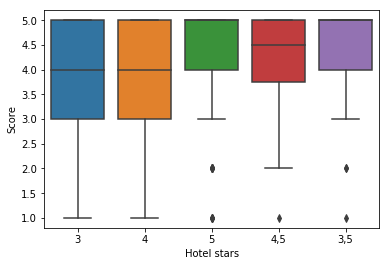

In [27]:
sns.boxplot(x='Hotel stars',y='Score',data=data)

Probably because all hotels are in Vegas, even hotels with lower hotel stars still provide good services to customers. Average score for each hotel star category is over 4. So there is no difference between hotels with higher stars and with lower stars 

Another possible angle is regarding to facilities.  In dataset, there are six variables about facilities, Pool,Gym,Tennis court	,Spa,Casino and Free internet. Let's have a look on whether providing these facilities can boost users' satisfication.

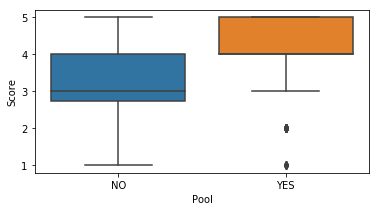

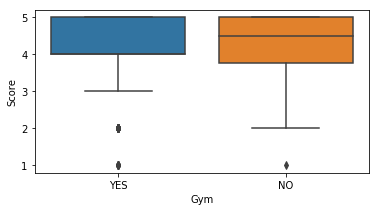

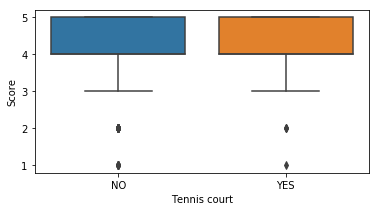

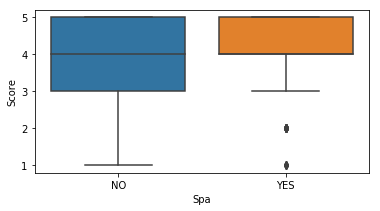

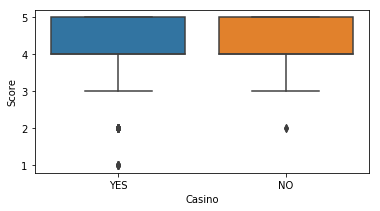

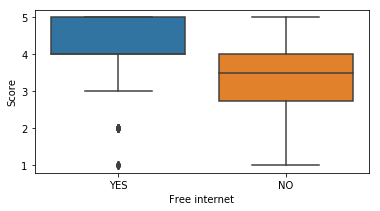

In [31]:
facilities_list=['Pool','Gym','Tennis court','Spa','Casino','Free internet']
for i in facilities_list:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=i,y='Score',data=data)
    plt.show()

There is a decrease on score for hotel without pool and free internet(why would people stay in hotels without free wifi??)

Dataset also contains users' purpose of staying. We can also see if there is any correlation with their rating 

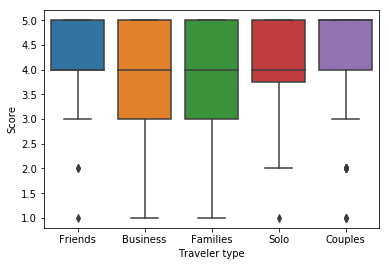

In [32]:
sns.boxplot(x='Traveler type',y='Score',data=data)

No significant variance..

Now back to users' country, see if any visitors from particular country will give higher score

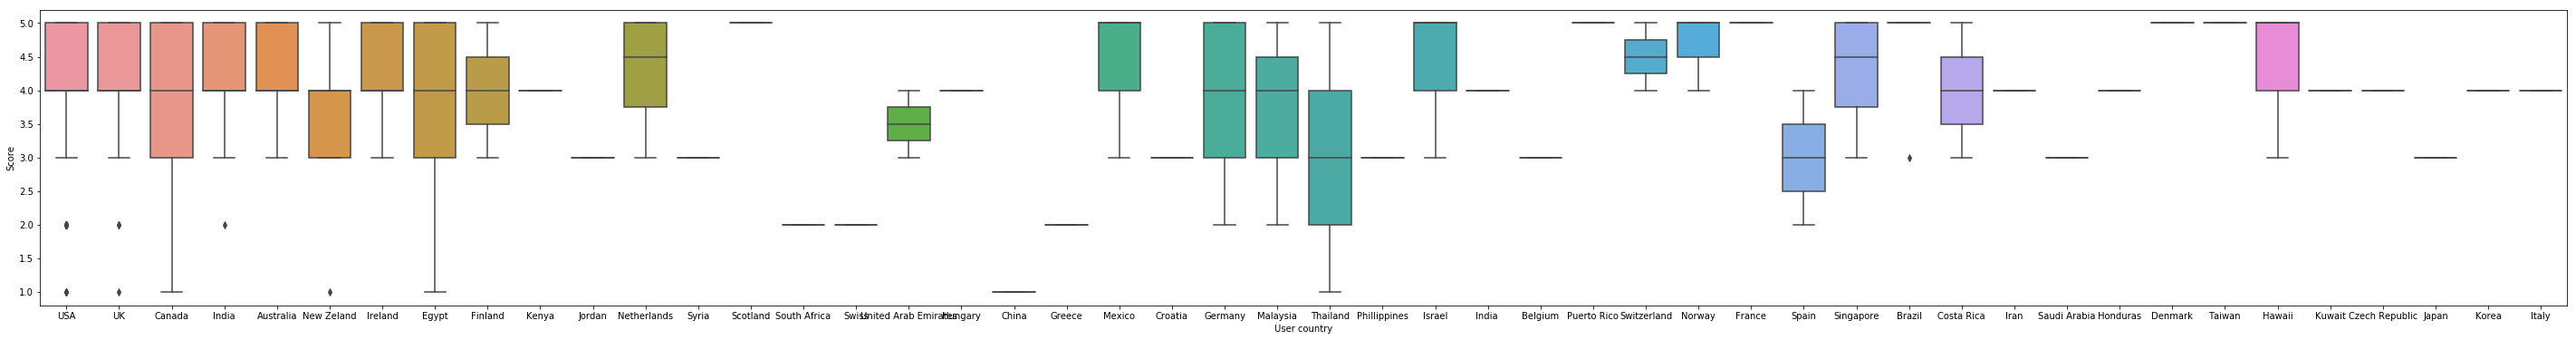

In [37]:
plt.figure(figsize=(50,6))
sns.boxplot(x='User country',y='Score',data=data)
plt.show()

For some countries, data are insufficiant or even there is only one record for that country, which is meaningless for explanation. However, average rates of Thailand and spain are only 3, while others are at least 4. 

One more analysis is about user's number of view and hotel review. Maybe more frequent users will give better or lower rating 

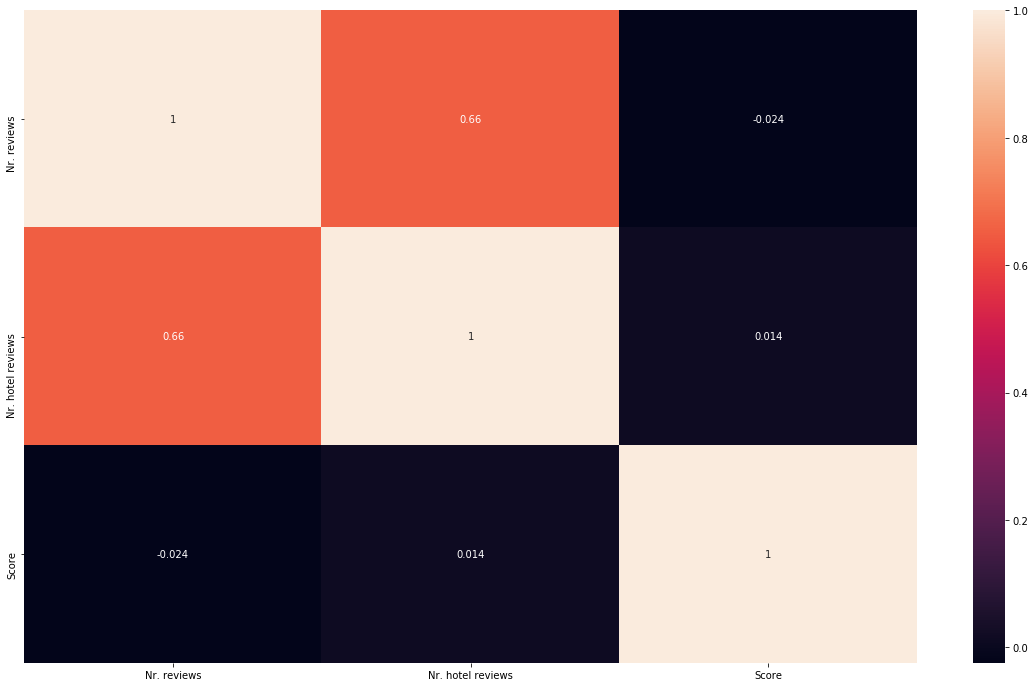

In [43]:
plt.figure(figsize=(20,12))
sns.heatmap(data[['Nr. reviews','Nr. hotel reviews','Score']].corr(), annot=True)
plt.show()

No any impact on score